Observations:
1. Ramicane, Capomulin, Zoniferol, Naftisol, Ceftamin treatments all saw improved survival rates of mice. 
2. However only Ramicane and Capomulin resulted in reduction of cancer tumor volume, so might be the only two considered effective.
3. Infubinol and Propriva were more harmful than leaving mice untreated
4. Ramicane and Capomulin reduced the growth rate of metastatic sites, but did not halt it.
5. (what I thought of while doing this: https://xkcd.com/1217/)

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plotter
from scipy.stats import sem
import seaborn
seaborn.set()

In [20]:
mouse_df =  pd.read_csv("raw_data/mouse_drug_data.csv")
clinical_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
combo_df = mouse_df.merge(clinical_df,left_on='Mouse ID',right_on= 'Mouse ID')
combo_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [22]:
grouped_data = combo_df.groupby(['Timepoint','Drug'])
grouped_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [23]:
errSet = grouped_data['Tumor Volume (mm3)'].sem().to_frame().reset_index(level = 1).pivot(columns='Drug')

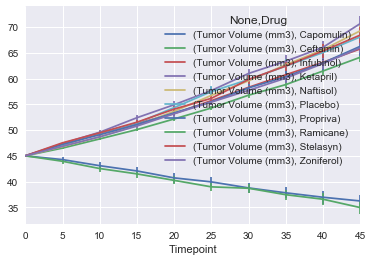

In [24]:
volumeOverTime =  grouped_data['Tumor Volume (mm3)'].mean().to_frame().reset_index(level = 1).pivot(columns='Drug')
volumeOverTime.plot(yerr=errSet)
plotter.show()

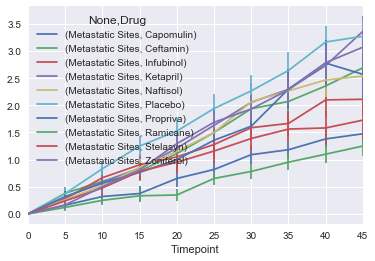

In [38]:
errSet2 = grouped_data['Metastatic Sites'].sem().to_frame().reset_index(level = 1).pivot(columns='Drug')
sitesOverTime =grouped_data['Metastatic Sites'].mean().to_frame().reset_index(level = 1).pivot(columns='Drug')
sitesOverTime.plot(yerr=errSet2,legend='best fit')
plotter.show()

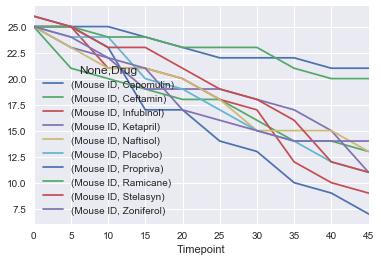

In [26]:
mouseOverTime = grouped_data['Mouse ID'].count().to_frame().reset_index(level = 1).pivot(columns='Drug')
mouseOverTime.plot()
plotter.show()

In [27]:
 grouped_data['Metastatic Sites'].value_counts().to_frame()

Metastatic Sites
Timepoint Drug      Metastatic Sites                  
0         Capomulin 0                               25
          Ceftamin  0                               25
          Infubinol 0                               25
          Ketapril  0                               25
          Naftisol  0                               25
          Placebo   0                               25
          Propriva  0                               26
          Ramicane  0                               25
          Stelasyn  0                               26
          Zoniferol 0                               25
5         Capomulin 0                               21
                    1                                4
          Ceftamin  0                               13
                    1                                8
          Infubinol 0                               18
                    1                                7
          Ketapril  0                               16
                    1                                7
          Naftisol  0                               17
                    1                                6
          Placebo   0                               15
                    1                                9
          Propriva  0                               17
                    1                                8
          Ramicane  0                               22
                    1                                3
          Stelasyn  0                               19
                    1                                6
          Zoniferol 0                               20
                    1                                4
...                                                ...
45        Infubinol 1                                3
                    2                                2
          Ketapril  4                                7
                    2                                3
                    3                                1
          Naftisol  1                                4
                    4                                4
                    3                                3
                    2                                2
          Placebo   4                                6
                    3                                3
                    1                                1
                    2                                1
          Propriva  2                                3
                    4                                2
                    1                                1
                    3                                1
          Ramicane  1                               11
                    2                                4
                    0                                3
                    3                                2
          Stelasyn  1                                5
                    2                                2
                    3                                2
                    0                                1
                    4                                1
          Zoniferol 4                                7
                    2                                4
                    3                                2
                    1                                1

[330 rows x 1 columns]

In [28]:
survivors_data = combo_df[combo_df.apply(lambda x: x['Timepoint']==45,axis = 1)==True]
initialSurvivors_data = combo_df[combo_df.apply(lambda x: x['Timepoint']==0,axis = 1)==True]

In [29]:
survivors_slim_data=survivors_data[['Mouse ID','Tumor Volume (mm3)']]
survivors_slim_data=survivors_slim_data.rename(columns={"Tumor Volume (mm3)":"Final Volume"})

In [30]:
all_survivors_data = initialSurvivors_data.merge(survivors_slim_data,right_on='Mouse ID',left_on='Mouse ID')

In [31]:
print(len(all_survivors_data))
all_survivors_data['% Change']=all_survivors_data.apply(lambda x: float(x['Final Volume'])*100/float(x['Tumor Volume (mm3)'])-100,axis = 1)
all_survivors_data.head()


130


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Volume,% Change
0,x402,Stelasyn,0,45.0,0,61.619606,36.932458
1,a492,Stelasyn,0,45.0,0,60.122011,33.604468
2,m269,Stelasyn,0,45.0,0,75.123690,66.941532
3,a963,Stelasyn,0,45.0,0,62.765093,39.477985
4,t451,Stelasyn,0,45.0,0,68.711630,52.692512


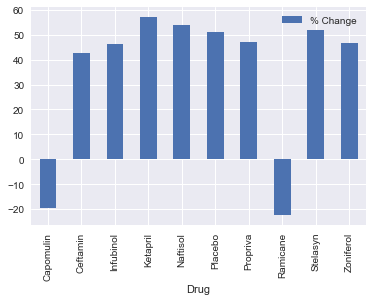

In [32]:
all_survivors_data.groupby('Drug')["% Change"].mean().to_frame().plot(kind='bar')
plotter.show()

In [15]:
all_survivors_data.groupby('Drug')["% Change"].mean().to_frame()

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [36]:
all_survivors_data['Drug'].value_counts()

Capomulin    21
Ramicane     20
Zoniferol    14
Naftisol     13
Ceftamin     13
Ketapril     11
Stelasyn     11
Placebo      11
Infubinol     9
Propriva      7
Name: Drug, dtype: int64

In [37]:
initialSurvivors_data['Drug'].value_counts()

Stelasyn     26
Propriva     26
Ramicane     25
Ceftamin     25
Infubinol    25
Capomulin    25
Zoniferol    25
Ketapril     25
Naftisol     25
Placebo      25
Name: Drug, dtype: int64